Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# Finanical Inclusion Survey Data

The main dataset contains demographic information and what financial services are used by approximately 33,610 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data have been split between training and test sets. The test set contains all information about each individual except for whether the respondent has a bank account or not.

Your goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

# About the data

You are asked to make predictions for each unique id in the test dataset about the likelihood of the person having a bank account. You will train your model on 70% of the data and test your model on the final 30% of the data.

* Train.csv is 70% of the data, across the four East African countries (i.e. Kenya, Rwanda, Tanzania, and Uganda)
* Test.csv is 30% of the complete dataset across the East African countries.
* VariableDefinitions.csv is the full list of variables and their explanations.
* SubmissionSubmission.csv is an example of what your submission file should look like. Note that the variable unique_id in the submission file is:

 uniqueid + " x " + country name
 
The order of the rows does not matter, but the names of the unique_id's must be correct. The column "bank_account" is your prediction of the likelihood of the user having a bank account.

Two or more countries could have the same unique_id, this is why your submission file needs to have uniqueid x country.

# Importing the Dataset

In [5]:
import pandas as pd
import numpy as np

df= pd.read_csv('TrainDataset.csv')

In [6]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Tanzania,2017,uniqueid_3293,No,Rural,No,2,18,Female,Child,Divorced/Seperated,Tertiary education,Remittance Dependent
1,Tanzania,2017,uniqueid_4423,No,Urban,Yes,2,22,Female,Spouse,Single/Never Married,Primary education,Self employed
2,Rwanda,2016,uniqueid_8196,No,Rural,Yes,4,31,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
3,Uganda,2018,uniqueid_803,No,Rural,No,1,56,Male,Head of Household,Single/Never Married,Primary education,Self employed
4,Rwanda,2016,uniqueid_8418,No,Rural,Yes,5,36,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18814,Rwanda,2016,uniqueid_8478,No,Rural,Yes,2,67,Female,Head of Household,Widowed,No formal education,Remittance Dependent
18815,Rwanda,2016,uniqueid_7486,No,Rural,Yes,3,25,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
18816,Rwanda,2016,uniqueid_6068,No,Rural,Yes,7,16,Male,Child,Single/Never Married,Primary education,Farming and Fishing
18817,Kenya,2018,uniqueid_4274,No,Rural,Yes,1,81,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 18819 non-null  object
 1   year                    18819 non-null  int64 
 2   uniqueid                18819 non-null  object
 3   bank_account            18819 non-null  object
 4   location_type           18819 non-null  object
 5   cellphone_access        18819 non-null  object
 6   household_size          18819 non-null  int64 
 7   age_of_respondent       18819 non-null  int64 
 8   gender_of_respondent    18819 non-null  object
 9   relationship_with_head  18819 non-null  object
 10  marital_status          18819 non-null  object
 11  education_level         18819 non-null  object
 12  job_type                18819 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.9+ MB


We have 13 columns in the dataset.

# Pre-Processing and EDA using Pandas Profiling package

In [3]:
pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=1928eb1f4e16716a1c14ddfa4107c6f70226ef75fe034fc1192b44de452caa77
  Stored in directory: c:\users\sunakshi.mamgain\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for confuse: filename=confuse-1.1.0-py3-none-any.whl size=17577 sha256=a7bafba88af14ae3ce39f9f52b862136f3488e3149df3bd3466192a631b510ae
  Stored in directory: c:\users\sunakshi.mamgain\appdata\local\pip\cache\wheels\18\e0\b3\79594ba4a96afaf41d39916ed83ce7d5ec031874c66a76eabb
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=36d6142cfe483fef3591f33890969e2f5cfd0a133250352dd3c87673e431638b
  Stored in directory: c:\users\sunakshi.mamgain\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin confuse imagehash
  Attempting uninstall: matplotlib
    Found existing installation: m

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

# Pre-processing Checking and Removing the Null and NaN values

In [122]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [123]:
df=df.dropna(axis=0)

# Pre-Processing Label Encoding

In [126]:
df['country'].unique()

array(['Tanzania', 'Rwanda', 'Uganda', 'Kenya'], dtype=object)

In [127]:
df['year'].unique()

array([2017, 2016, 2018], dtype=int64)

In [128]:
df['bank_account'].unique()

array(['No', 'Yes'], dtype=object)

In [129]:
df['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [130]:
df['cellphone_access'].unique()

array(['No', 'Yes'], dtype=object)

In [131]:
df['household_size'].unique()

array([ 2,  4,  1,  5,  9,  6,  3,  8, 11, 10,  7, 12, 15, 14, 13, 16, 20,
       18, 21], dtype=int64)

In [132]:
df['age_of_respondent'].unique()

array([ 18,  22,  31,  56,  36,  23,  39,  37,  52,  65,  40,  30,  44,
        24,  29,  86,  42,  32,  75,  28,  35,  27,  59,  25,  85,  26,
        64,  16,  34,  20,  55,  38,  49,  19,  46,  67,  17,  66,  45,
        50,  21,  79,  54,  91,  62,  81,  48,  41,  47,  68,  70,  33,
        95,  58,  80,  43,  63,  60,  76,  82,  61,  53,  57,  69,  51,
        72,  90,  71,  92,  96,  74,  84,  98,  78,  77,  73,  89,  83,
        88,  94,  87,  93, 100,  99,  97], dtype=int64)

In [133]:
df['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

In [134]:
df['relationship_with_head'].unique()

array(['Child', 'Spouse', 'Head of Household', 'Parent', 'Other relative',
       'Other non-relatives'], dtype=object)

In [135]:
df['marital_status'].unique()

array(['Divorced/Seperated', 'Single/Never Married',
       'Married/Living together', 'Widowed', 'Dont know'], dtype=object)

In [136]:
df['education_level'].unique()

array(['Tertiary education', 'Primary education', 'No formal education',
       'Secondary education', 'Vocational/Specialised training',
       'Other/Dont know/RTA'], dtype=object)

In [137]:
df['job_type'].unique()

array(['Remittance Dependent', 'Self employed', 'Farming and Fishing',
       'Informally employed', 'Dont Know/Refuse to answer',
       'Other Income', 'Government Dependent',
       'Formally employed Private', 'No Income',
       'Formally employed Government'], dtype=object)

In [138]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [139]:
df['job_type']=le.fit_transform(df['job_type'])
df['education_level']=le.fit_transform(df['education_level'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['relationship_with_head']=le.fit_transform(df['relationship_with_head'])
df['gender_of_respondent']=le.fit_transform(df['gender_of_respondent'])
df['cellphone_access']=le.fit_transform(df['cellphone_access'])
df['location_type']=le.fit_transform(df['location_type'])
df['country']=le.fit_transform(df['country'])
df['bank_account']=le.fit_transform(df['bank_account'])

In [140]:
df['year']=le.fit_transform(df['year'])

# Finding the Correlation

In [142]:
df.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.096757,-0.161547,0.153177,-0.149371,-0.123184,-0.057192,-0.021864,0.126557,0.009664,-0.051220,0.377612
year,-0.096757,1.000000,0.109098,0.216528,-0.064812,-0.054504,-0.023677,0.000144,0.002233,-0.023422,0.171362,0.268455
bank_account,-0.161547,0.109098,1.000000,0.085742,0.211920,-0.028647,0.021330,0.115665,-0.071117,-0.039687,0.325631,-0.065751
location_type,0.153177,0.216528,0.085742,1.000000,-0.082532,-0.255996,-0.044905,0.015781,0.010977,0.082124,0.120687,0.368555
cellphone_access,-0.149371,-0.064812,0.211920,-0.082532,1.000000,0.088005,-0.103968,0.105131,-0.054054,-0.094580,0.254553,-0.145935
household_size,-0.123184,-0.054504,-0.028647,-0.255996,0.088005,1.000000,-0.131367,0.015314,0.108107,-0.127539,-0.003222,-0.160117
age_of_respondent,-0.057192,-0.023677,0.021330,-0.044905,-0.103968,-0.131367,1.000000,0.011205,-0.151790,0.225616,-0.351885,-0.099099
gender_of_respondent,-0.021864,0.000144,0.115665,0.015781,0.105131,0.015314,0.011205,1.000000,-0.471259,-0.103445,0.122305,-0.030958
relationship_with_head,0.126557,0.002233,-0.071117,0.010977,-0.054054,0.108107,-0.151790,-0.471259,1.000000,-0.146051,-0.021011,0.041135
marital_status,0.009664,-0.023422,-0.039687,0.082124,-0.094580,-0.127539,0.225616,-0.103445,-0.146051,1.000000,-0.125030,0.060898


# Checking for Outliers

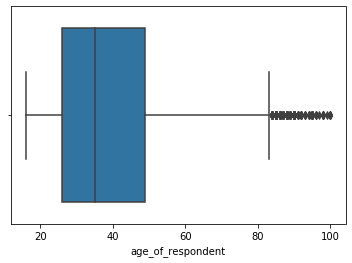

In [143]:
import seaborn as sns
sns.boxplot(x=df['age_of_respondent'])

If you carefully observe "Maximum" is at 82 after that there are outliers. 

In [144]:
df[df['age_of_respondent']>=82]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
18,2,1,uniqueid_4105,1,0,1,2,86,1,1,3,4,9
40,0,2,uniqueid_1252,1,0,1,4,85,1,1,4,0,4
115,2,1,uniqueid_4218,0,1,0,2,91,1,1,3,0,9
153,1,0,uniqueid_1921,0,0,0,3,95,0,1,4,0,5
242,0,2,uniqueid_2525,0,0,1,3,82,1,1,2,0,1
393,3,2,uniqueid_1573,0,0,0,4,95,0,5,2,2,6
468,0,2,uniqueid_1305,0,0,0,3,82,1,1,4,2,1
470,2,1,uniqueid_6464,0,1,0,1,90,0,1,4,0,6
623,2,1,uniqueid_667,0,1,0,1,92,0,1,4,0,4
638,2,1,uniqueid_6615,0,0,0,1,96,0,1,4,0,6


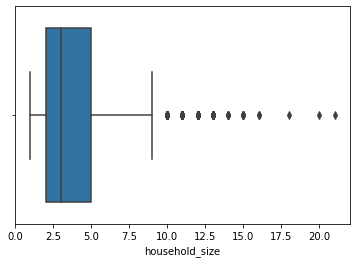

In [146]:
sns.boxplot(x=df['household_size'])

Similarly for household size we have Maximum at value 9.0 after which all the points are outliers.

# ANOVA Test 

This test is done with the target variable 'bank account' taking all the categorical variables. If the p-value (PR) is less than 0.05 (5%) then that particular feature contributes in the classification whether the person has bank account or not.

In [147]:
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [149]:
model = ols('bank_account ~ marital_status', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bank_account   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     29.68
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           5.15e-08
Time:                        22:04:23   Log-Likelihood:                -6867.8
No. Observations:               18819   AIC:                         1.374e+04
Df Residuals:                   18817   BIC:                         1.376e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1749      0.007     26.526      0.000       0.162       0.188
marital_status    -0.0138      0.003     -5.448      0.000      -0.019      -0.009
==============================================================================
Omnibus:                     6678.424   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16994.579
Skew:                           2.049   Prob(JB):                         0.00
Kurtosis:                       5.210   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
aov_table

,sum_sq,df,F,PR(>F)
marital_status,3.606510,1.0,29.684754,5.147104e-08
Residual,2286.146824,18817.0,NaN,NaN


In [153]:
model = ols('bank_account ~ education_level', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
education_level,242.795107,1.0,2231.933933,0.0
Residual,2046.958227,18817.0,NaN,NaN


In [154]:
model = ols('bank_account ~ job_type', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
job_type,9.899013,1.0,81.702468,1.731951e-19
Residual,2279.854322,18817.0,NaN,NaN


In [155]:
model = ols('bank_account ~ relationship_with_head', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
relationship_with_head,11.580564,1.0,95.651867,1.550013e-22
Residual,2278.172770,18817.0,NaN,NaN


In [156]:

model = ols('bank_account ~ gender_of_respondent', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
gender_of_respondent,30.632955,1.0,255.152541,4.638561e-57
Residual,2259.120380,18817.0,NaN,NaN


In [157]:
model = ols('bank_account ~ age_of_respondent', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age_of_respondent,1.041783,1.0,8.565181,0.003431
Residual,2288.711551,18817.0,NaN,NaN


In [158]:
model = ols('bank_account ~ household_size', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
household_size,1.879136,1.0,15.455264,0.000085
Residual,2287.874199,18817.0,NaN,NaN


In [159]:
model = ols('bank_account ~ cellphone_access', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cellphone_access,102.833029,1.0,884.810067,4.834916e-190
Residual,2186.920306,18817.0,NaN,NaN


In [160]:
model = ols('bank_account ~ location_type', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
location_type,16.833548,1.0,139.361222,4.764423e-32
Residual,2272.919786,18817.0,NaN,NaN


In [161]:
model = ols('bank_account ~ year', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
year,27.253642,1.0,226.666009,6.297018e-51
Residual,2262.499693,18817.0,NaN,NaN


If you notice all the variables have p-value less than 0.05 (5%). If the condition is reverse and there would have been some variables with p-value greater than 0.05 then we would have removed those variables from the data.

# Modeling - without removing outliers

In [163]:
df1=df.drop(['bank_account','uniqueid'],axis=1)

In [165]:
from sklearn.model_selection import train_test_split
y=df['bank_account']

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42)

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=34).fit(X_train, y_train)
train_pred=clf.predict(X_train)

C:\Users\sunakshi.mamgain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [167]:
clf.score(X_train,train_pred)

1.0

In [168]:
train_pred=clf.predict(X_test)
clf.score(X_test,train_pred)

1.0

If you notice, when we are not removing outliers then the accuracy is coming 1.0 (100%). Thus we can say the model is overfitting. Now let's try to remove outliers and then classify.

# Removing Outliers and Modeling 

In [169]:
df=df[df['age_of_respondent']<82]

In [170]:
df[df['age_of_respondent']>=82]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [171]:
df=df[df['household_size']<=9]

In [173]:
from sklearn.model_selection import train_test_split
y=df['bank_account']
df2=df.drop(['bank_account','uniqueid'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.33, random_state=42)

In [174]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=34).fit(X_train, y_train)
train_pred=clf.predict(X_train)

C:\Users\sunakshi.mamgain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [175]:
clf.score(X_train,train_pred)

1.0

In [177]:
test_pred=clf.predict(X_test)
clf.score(X_test,train_pred)

1.0

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5153
           1       0.67      0.24      0.35       872

    accuracy                           0.87      6025
   macro avg       0.78      0.61      0.64      6025
weighted avg       0.85      0.87      0.85      6025



In [179]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[5050,  103],
       [ 664,  208]], dtype=int64)

In [182]:
from sklearn.metrics import f1_score
f1_score(y_test, test_pred, average='macro')

0.6405338473066456

In [183]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [184]:
clf.fit(X_train, y_train)

C:\Users\sunakshi.mamgain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
test_pred=clf.predict(X_test)
clf.score(X_test,train_pred)

0.9284647302904564

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5153
           1       0.57      0.35      0.44       872

    accuracy                           0.87      6025
   macro avg       0.73      0.65      0.68      6025
weighted avg       0.85      0.87      0.85      6025



In [187]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[4922,  231],
       [ 563,  309]], dtype=int64)

We have applied 2 models- Logistic Regression and Random forest. The model Random Forest is giving good results if you carefully observe the confusion matrix of both the models.

# Deployment

In [ ]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
from flask import Flask,request,jsonify,render_template
import pickle
import numpy as np
app=Flask(__name__)
model=pickle.load(open('model.pkl','rb'))
debug=True
@app.route('/')
def home():
    #return render_template('index')
    return render_template('index.html')
#@app.route('/predict',methods=['POST','GET'])
@app.route('/predict',methods=['POST'])
def predict():
    #print(request.form)
    int_features=[int(x) for x in request.form.values()]
    final_features=[np.array(int_features)]
    prediction=model.predict(final_features)
    
    output=prediction[0]
    
    #return render_template('index',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))
    if output==1:
        result='The Person has a bank account'
    else:
        result="The Person doesn't have a bank account"
    return render_template('index.html',prediction_text='{}'.format(result))

if __name__=='__main__':
    app.run()